# 9 객체 직렬화


프로그램 메모리상에 존재하는 객체를 저장하거나 다른 프로그램으로 전달하려면 직렬화라는 작업이 필요하다.
파이썬 프로그램간의 직렬화는 pickle로 이루어지며, 다른 프로그램간의 직렬화는 json, csv, avro 등이 이용될 수 있다.

<img src="img/serialization.png" width=600>

고려사항들

 * 어떤 프로토콜을 사용?
 * 어떤 데이터를 전송?
 * 효율적인 저장 및 전송 메카니즘?
 * 확장(scaling) 가능?
 * 유연성
 * 사용하기 쉬운가?
 * 속도, 데이터 크기
 * 텍스트 / 바이너리
 * 여러 언어에서 지원
 
SOAP, CORBA, DCOM, COM+, JSON, PLAIN TEXT, XML, ...

## 9.1 피클링

피클링을 이용하면 문자열 자료 이외의 복잡한 자료형도 선언 없이 저장할 수 있다.
파이썬3는 이진 파일로 저장하며 
객체를 파일로 출력하려면 pickle.dump를, 객체를 파일에서 읽어들이려면 pickle.load를 사용한다.

In [1]:
L = [1,2,'피클링']
digits = {'one':'하나', 'two':'둘', 'three':'셋'}

데이터들을 파일에 피클링한다.

In [2]:
import pickle 

with open('test.pickle', 'wb') as f:
    pickle.dump(L, f)
    pickle.dump(digits, f)

데이터를 파일에서 읽어들인다.

In [3]:
with open('test.pickle', 'rb') as f: 
    L2 = pickle.load(f) # 언피클링 
    digits2 = pickle.load(f)   # 한 번 더

In [4]:
L2

[1, 2, '피클링']

In [5]:
digits2

{'one': '하나', 'three': '셋', 'two': '둘'}

피클링 할 객체를 파일이 아닌 바이트열로 출력하거나 바이트열에서 객체를 읽어 들이려면 dumps( ) 와loads( ) 함수를 사용할 수 있다.
dumps 메서드의 출력 결과는 문자열이 아닌 바이트열임에 주의하자.

In [6]:
b = pickle.dumps(L)
b

b'\x80\x03]q\x00(K\x01K\x02X\t\x00\x00\x00\xed\x94\xbc\xed\x81\xb4\xeb\xa7\x81q\x01e.'

In [7]:
pickle.loads(b)

[1, 2, '피클링']

### 9.1.1 실전 예

`ch07/simple_convnet.py`

In [8]:
    # ...

    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
            self.layers[key].W = self.params['W' + str(i+1)]
            self.layers[key].b = self.params['b' + str(i+1)]

## 9.2 JSON

JSON (JavaScript Object Notation)은 자바스크립트 언어 에서 정의된 간단한 데이터 교환 형식이다. 이 형식은 텍스트 형식이어서 사람이나 기계가 분석하고 생성하기에 용이하다. JSON은 언어에 독립적으로 설계되었고 다양한 언어에서 지원하고 있다.
다양한 시스템 사이의 데이터 교환 용도로 일반적으로 사용된다.
json 객체의 (name value) object형은 파이썬의 사전과 유사하고, array형은 리스트와 유사하다.

파이썬은 json 표준 모듈을 지원하고 있으며 pickle 모듈과 유사한 인터페이스를 제공한다.
파이썬 객체를 json 포맷으로 변환하려면 dump 혹은 dumps 함수를 이용하고, json 객체를 파이썬 객체로 변환하려면 load, loads를 이용한다. dump, load는 파일로 객체를 입출력하고, dumps, loads는 문자열 객체를 다룬다.

다음 코드는 dump, load의 활용 예이다.

In [9]:
import json

t = (1,2,3, 'python', 'rules')  # tuple
l = [3,4,5] 
d = {'tuple':t, 'list':l}

with open('test1.json', 'w') as f:
    json.dump(d, f)

파일로 출력된 내용을 확인해보자. 텍스트 파일이며 사람이 읽을 수 있다.

In [10]:
print(open('test1.json').read())

{"list": [3, 4, 5], "tuple": [1, 2, 3, "python", "rules"]}


load를 이용하여 파일에서 읽어서 파이썬 객체로 변환한다.

In [11]:
with open('test1.json') as f:
    print(json.load(f))

{'list': [3, 4, 5], 'tuple': [1, 2, 3, 'python', 'rules']}


다음 예는 문자열 객체로 json을 다루는 dumps, loads의 활용 예이다.

In [12]:
s = json.dumps(d)
s

'{"list": [3, 4, 5], "tuple": [1, 2, 3, "python", "rules"]}'

In [13]:
json.loads(s)

{'list': [3, 4, 5], 'tuple': [1, 2, 3, 'python', 'rules']}

### 9.2.1 지오코딩(Geocoding)

지오코딩은 주소를 지리적 좌표로 변환하는 프로세스이다.
구글에서는 지오코딩 api를 제공하고 있다. 다음 링크를 따라가면 api 문서를 확인할 수 있다.

 * https://developers.google.com/maps/documentation/geocoding/
 

In [14]:
# 서울시청

import requests

url = "http://maps.googleapis.com/maps/api/geocode/json?address=%EC%84%9C%EC%9A%B8%EC%8B%9C%EC%B2%AD"
res = requests.get(url)
print (res.text)

{
   "results" : [
      {
         "address_components" : [
            {
               "long_name" : "110",
               "short_name" : "110",
               "types" : [ "political", "premise" ]
            },
            {
               "long_name" : "Sejong-daero",
               "short_name" : "Sejong-daero",
               "types" : [ "political", "sublocality", "sublocality_level_4" ]
            },
            {
               "long_name" : "Taepyeongno 1(il)-ga",
               "short_name" : "Taepyeongno 1(il)-ga",
               "types" : [ "political", "sublocality", "sublocality_level_2" ]
            },
            {
               "long_name" : "Jung-gu",
               "short_name" : "Jung-gu",
               "types" : [ "political", "sublocality", "sublocality_level_1" ]
            },
            {
               "long_name" : "Seoul",
               "short_name" : "Seoul",
               "types" : [ "administrative_area_level_1", "political" ]
            },
    

서버에 요청을 보낼 때 'Accept-Language' 속성에 'ko'로 한글을 설정해주면 서버에서 한글로 정보를 보내준다.

In [15]:
# 한글 출력 받기..
import requests

url = 'http://maps.googleapis.com/maps/api/geocode/json'

values = {'address' : '서울시청'}
headers = {'Accept-Language':'ko'}

res = requests.get(url, params=values, headers=headers)
print (res.text)

{
   "results" : [
      {
         "address_components" : [
            {
               "long_name" : "110",
               "short_name" : "110",
               "types" : [ "political", "premise" ]
            },
            {
               "long_name" : "세종대로",
               "short_name" : "세종대로",
               "types" : [ "political", "sublocality", "sublocality_level_4" ]
            },
            {
               "long_name" : "태평로1가",
               "short_name" : "태평로1가",
               "types" : [ "political", "sublocality", "sublocality_level_2" ]
            },
            {
               "long_name" : "중구",
               "short_name" : "중구",
               "types" : [ "political", "sublocality", "sublocality_level_1" ]
            },
            {
               "long_name" : "서울특별시",
               "short_name" : "서울특별시",
               "types" : [ "administrative_area_level_1", "political" ]
            },
            {
               "long_name" : "대한민국",
         

위에서 받은 결과는 문자열이다. res 응답 객체가 json이란 메서드를 가지고 있어서 직접 변환된 결과를 얻을 수 있다. 

In [16]:
d2 = res.json()

`json` 파이썬 모듈을 이용하여 변환할 수도 있다.

In [17]:
import json

d2 = json.loads(res.text)

위도 경도를 추출해내는 코드를 아래에 보인다.

In [18]:
print (d2['results'][0]["formatted_address"])
print (d2['results'][0]["geometry"]["location"])

대한민국 서울특별시 중구 태평로1가 세종대로 110 서울특별시청
{'lng': 126.977963, 'lat': 37.56647}


구글 지도에서 이 좌표를 보려면 다음과 같이 주소를 만들어 startfile에 넘겨주면 된다.

In [19]:
import os

loc = d2['results'][0]["geometry"]["location"]
os.startfile('https://www.google.co.kr/maps/place/{},{}'.format(loc['lat'], loc['lng']))

## 9.3 Apache Avro

비교대상 프로토콜 : protocol buffer(PB) / Thrift

PB

 * Google
 
Apache Thrift

 * Facebook
 
Thrift의 동작 원리

<img src="img/thrift.png" width=500>


IDL(Interface Description Language)를 통한 자료 구조 정의

<img src="img/IDL.png" width=500>

Avro

 * 가장 최신의 직렬화 시스템
 * 스키마 기반 시스템
 * 데이터 생성시 스키마 포함되어 함께 전송
 * 소스 코드를 별도로 생성할 필요 없음
 * 데이터 구조 선언할 때 JSON 사용


In [20]:
!pip install avro_python3

### 9.3.1 schema 정의


In [21]:
%%file user.avsc
{"namespace": "example.avro",
 "type": "record",
 "name": "User",
 "fields": [
     {"name": "name", "type": "string"},
     {"name": "favorite_number",  "type": ["int", "null"]},
     {"name": "favorite_color", "type": ["string", "null"]}
 ]
}

 * `type` : 스키마 최상위 일 경우 항상 `'record'`
 * `namespace` : 스키마 구분하기 위한 URI
 * `name` : namespace와 결합되는 스키마 이름
  * 위 예에서 스키마의 fully qualified name 은 `example.avro.User` 이다.
 * `fields` : 실제 스키마 정의 시작

### 9.3.2 Serialization


In [22]:
import avro.schema
from avro.datafile import DataFileReader, DataFileWriter
from avro.io import DatumReader, DatumWriter

schema = avro.schema.Parse(open("user.avsc").read())

writer = DataFileWriter(open("users.avro", "wb"), DatumWriter(), schema)
writer.append({"name": "Alyssa", "favorite_number": 256})
writer.append({"name": "이강성", "favorite_number": 7, "favorite_color": "파랑"})
writer.close()

### 9.3.3 Deserialization


In [23]:
import avro.schema
from avro.datafile import DataFileReader, DataFileWriter
from avro.io import DatumReader, DatumWriter

reader = DataFileReader(open("users.avro", "rb"), DatumReader())
for user in reader:
    print(user)
reader.close()

{'name': 'Alyssa', 'favorite_number': 256, 'favorite_color': None}
{'name': '이강성', 'favorite_number': 7, 'favorite_color': '파랑'}


## 9.4 CSV

CSV(comma-separated values) 파일은 쉼표(,)로 구분되는 텍스트 데이터 파일이다. 
CSV는 단순하고 운영체제나 프로그램에 의존하지 않으므로 많은 자료들이 csv 형식으로 이루어져 있고 보편적으로 많이 사용된다.
CSV 파일을 읽거나 분석하는데 여러 방법이 있긴 하지만 pandas 모듈이 가장 편리하다. 예제로 사용할 1024년 날씨 파일(기후자료_2014_108.csv)의 앞 부분을 살펴보자. 이 파일은 2014년 1월 1일 0시 부터 2014년 12월 31일 23시까지 1시간 간격으로 측정한 자료이다.

앞 부분에 5줄의 설명 정보가 있고 6번째 줄은 데이터의 헤더 정보 그리고 7번째 줄부터는 실제 데이터가 저장되어 있다.

### 9.4.1 읽어오기
Pandas 모듈은 파이썬 데이터 분석 모듈이다.
Pandas를 이용한 처리 예를 살펴보자.

`read_csv`를 이용하여 파일을 읽는다. 앞의 의미없는 다섯 줄은 건너뛰고 읽기 위해 `skiprows` 옵션을 추가했다.
`DataFrame` 자료가 반환된다.

In [24]:
import pandas as pd

In [25]:
df = pd.read_csv('data/기후자료_2014_108.csv', skiprows=5)
type(df)

pandas.core.frame.DataFrame

`DataFrame`은 2차원의 자료를 저장하며, 변경가능하고, 다른 종류의 데이터를 포함할 수 있는 구조이다.
행과 열은 이름을 가지고 있다. 1차원 데이터를 표현하는 열 데이터(`Series`)가 모여서 `DataFrame`을 구성한다고 볼 수 있으며, `pandas`의 가장 기본적인 자료구조이다.

### 9.4.2 기본 조작

`head()` 메서드를 이용하여 `df`의 앞 부분 정보를 출력해보자.
`NaN`은 Not a number의 의미로 데이터가 정의되지 않았거나 수치값이 정의되지 않았다는 뜻이다. 

In [26]:
df.head()

,지점번호,지점,일시,기온 (℃),시간강수량 (mm),풍향 (deg),풍속 (m/s),해면기압 (hPa),원시자료
0,108,서울,2014-01-01 00,3.3,NaN,250.0,3.8,1012.5,NaN
1,108,서울,2014-01-01 01,2.6,NaN,250.0,2.3,1012.9,NaN
2,108,서울,2014-01-01 02,1.7,NaN,250.0,1.7,1013.1,NaN
3,108,서울,2014-01-01 03,1.4,NaN,250.0,1.4,1012.9,NaN
4,108,서울,2014-01-01 04,0.9,NaN,270.0,2.8,1013.2,NaN


`DataFrame`을 직접 생성할 수도 있는데, 다음과 같이 자료는 열 단위로 표현된다. `index`는 행의 이름들이다.

In [27]:
df_sample = pd.DataFrame({'A':['a', 'b', 'c'], 'B':[54, 67, 89]}, index=['Jan', 'Feb', 'Mar'])
df_sample

,A,B
Jan,a,54
Feb,b,67
Mar,c,89


각 행과 열은 이름으로 접근 가능하다.

In [28]:
df_sample['A']   # 열

Jan    a
Feb    b
Mar    c
Name: A, dtype: object

In [29]:
df_sample.loc['Jan']  # 행

A     a
B    54
Name: Jan, dtype: object

열 자료형은 `Series`이다.

In [30]:
col = df_sample['A']
type(col)

pandas.core.series.Series

`Series` 자료형도 행의 레이블을 갖는다.

In [31]:
col

Jan    a
Feb    b
Mar    c
Name: A, dtype: object

`DataFrame`의 `describe()` 메서드는 다양한 기본 통계 값을 요약해준다. `NaN` 값은 통계에서 제외된다.

In [32]:
df.describe()

,지점번호,기온 (℃),시간강수량 (mm),풍향 (deg),풍속 (m/s),해면기압 (hPa),원시자료
count,8777.0,8765.000000,793.000000,8764.000000,8764.000000,8761.000000,0.0
mean,108.0,13.391455,1.021311,182.609995,2.657360,1016.403093,NaN
std,0.0,10.679563,2.475932,109.460836,1.426319,8.408304,NaN
min,108.0,-13.100000,0.000000,0.000000,0.000000,993.800000,NaN
25%,108.0,4.400000,0.000000,70.000000,1.600000,1009.600000,NaN
50%,108.0,14.700000,0.100000,230.000000,2.500000,1016.600000,NaN
75%,108.0,22.500000,1.000000,270.000000,3.500000,1022.800000,NaN
max,108.0,35.700000,26.000000,360.000000,10.500000,1037.500000,NaN


이 중에서 '원시자료' 열은 의미가 없으므로 삭제하자.

In [33]:
del df['원시자료']

열이 삭제된 것을 확인한다. 

In [34]:
df.head()

,지점번호,지점,일시,기온 (℃),시간강수량 (mm),풍향 (deg),풍속 (m/s),해면기압 (hPa)
0,108,서울,2014-01-01 00,3.3,NaN,250.0,3.8,1012.5
1,108,서울,2014-01-01 01,2.6,NaN,250.0,2.3,1012.9
2,108,서울,2014-01-01 02,1.7,NaN,250.0,1.7,1013.1
3,108,서울,2014-01-01 03,1.4,NaN,250.0,1.4,1012.9
4,108,서울,2014-01-01 04,0.9,NaN,270.0,2.8,1013.2


열 이름을 입력하기가 어려우므로 열 이름을 단순하게 변경하기로 한다.

In [35]:
df.columns = ['지점번호', '지점', '일시', '기온', '시간강수량', '풍향', '풍속', '해면기압']

변경된 열 이름을 확인해본다.

In [36]:
df.head()

,지점번호,지점,일시,기온,시간강수량,풍향,풍속,해면기압
0,108,서울,2014-01-01 00,3.3,NaN,250.0,3.8,1012.5
1,108,서울,2014-01-01 01,2.6,NaN,250.0,2.3,1012.9
2,108,서울,2014-01-01 02,1.7,NaN,250.0,1.7,1013.1
3,108,서울,2014-01-01 03,1.4,NaN,250.0,1.4,1012.9
4,108,서울,2014-01-01 04,0.9,NaN,270.0,2.8,1013.2


`NaN`을 0으로 채우기로 한다.
데이터프레임 내부에 값을 변경하려면 inplace=True를 지정한다.

In [37]:
df['시간강수량'].fillna(0, inplace=True)

변경 내용을 확인해본다.

In [38]:
df.head()

,지점번호,지점,일시,기온,시간강수량,풍향,풍속,해면기압
0,108,서울,2014-01-01 00,3.3,0.0,250.0,3.8,1012.5
1,108,서울,2014-01-01 01,2.6,0.0,250.0,2.3,1012.9
2,108,서울,2014-01-01 02,1.7,0.0,250.0,1.7,1013.1
3,108,서울,2014-01-01 03,1.4,0.0,250.0,1.4,1012.9
4,108,서울,2014-01-01 04,0.9,0.0,270.0,2.8,1013.2


### 9.4.3 열 단위 접근

한 열(기온)만 추출해보자. `df.이름`, `df['이름']` 형식이 모두 가능하다.

In [39]:
df_sample = pd.DataFrame({'A':['a', 'b', 'c'], 'B':[54, 67, 89], 
                          'C':[0.2, 0.3, 0.7]}, index=['Jan', 'Feb', 'Mar'])
df_sample

,A,B,C
Jan,a,54,0.2
Feb,b,67,0.3
Mar,c,89,0.7


In [40]:
df_sample.A

Jan    a
Feb    b
Mar    c
Name: A, dtype: object

In [41]:
df_sample['A']

Jan    a
Feb    b
Mar    c
Name: A, dtype: object

In [42]:
df_sample[['A', 'C']]

,A,C
Jan,a,0.2
Feb,b,0.3
Mar,c,0.7


`DataFrame`을 `for` 루프에 넣으면 열 이름에 대한 반복이 이루어진다.

In [43]:
for ele in df_sample:
    print(ele)

A
B
C


따라서 열에 의한 반복이 가능하다.

In [44]:
for colname in df_sample:
    print(df_sample[colname])

Jan    a
Feb    b
Mar    c
Name: A, dtype: object
Jan    54
Feb    67
Mar    89
Name: B, dtype: int64
Jan    0.2
Feb    0.3
Mar    0.7
Name: C, dtype: float64


### 9.4.4 행 단위 접근

행 단위로의 접근은 다음 세 가지 속성으로 가능하다.
* `iloc`: 위치에 기반한 행 접근
* `loc`: 인덱스 이름(값)을 이용한 접근
* `ix`: 위치에 기반한 행 접근과 인덱스 값에 기반한 접근 모두 가능하다(혼합형). 그러나 인덱스 열이 숫자인 경우에는 인덱스 값에 의한 접근만 가능하다.

In [45]:
df_sample = pd.DataFrame({'A':['a', 'b', 'c'], 'B':[54, 67, 89]}, index=['Jan', 'Feb', 'Mar'])
df_sample

,A,B
Jan,a,54
Feb,b,67
Mar,c,89


In [46]:
df_sample.iloc[0]   # 위치에 기반한 접근

A     a
B    54
Name: Jan, dtype: object

In [47]:
df_sample.loc['Jan']  # 인덱스 값에 기반한 접근

A     a
B    54
Name: Jan, dtype: object

In [48]:
df_sample.ix[0]  # 위치에 기반한 접근

A     a
B    54
Name: Jan, dtype: object

In [49]:
df_sample.ix['Jan']  # 인덱스 값에 의한 접근

A     a
B    54
Name: Jan, dtype: object

행에 의한 반복은 `iterrows()` 메서드를 이용한다.

In [50]:
for index, row in df_sample.iterrows():
    print(index, row['A'], row['B'])

Jan a 54
Feb b 67
Mar c 89


슬라이싱 기능을 이용하여 행의 범위를 지정할 수 있다. 이 때 마지막 값이 포함되는 것에 주의하자.

In [51]:
df_sample.loc['Jan':'Feb']

,A,B
Jan,a,54
Feb,b,67


위치 기반의 `iloc`을 이용할 경우는 마지막 첨자가 포함되지 않는다.

In [52]:
df_sample.iloc[0:1]

,A,B
Jan,a,54


### 9.4.5 파일 변환

다양한 파일로의 변환이 가능하다. 일부 기능만 보여도 다음과 같다.

* `to_csv()` : CSV 파일로 저장한다
* `to_dict()` : 사전 자료형으로 변환한다
* `to_excel()` : 엑셀 파일에 저장한다
* `to_hdf()` : HDF 파일로 저장한다
* `to_html()` : HTML 문자열로 변환한다
* `to_json()` : json 포맷 파일로 변환한다
* `to_string()` :  화면에서 읽기 좋은 형태로 변환

한 예로 엑셀 파일 형식으로 출력해보자.

In [53]:
df.to_excel('data/기후자료_2014_108.xlsx')

### 9.4.6 numpy의 array 형으로 변환

`numpy`의 `array`로 변경하려면 `values` 속성을 사용할 수 있다.
다양한 형의 자료가 섞여있는 경우에는 `object` 타입의 `array`가 만들어진다.

In [54]:
df.values

array([[108, '서울', '2014-01-01 00', ..., 250.0, 3.8, 1012.5],
       [108, '서울', '2014-01-01 01', ..., 250.0, 2.3, 1012.9],
       [108, '서울', '2014-01-01 02', ..., 250.0, 1.7, 1013.1],
       ..., 
       [108, '서울', '2014-12-31 21', ..., 290.0, 4.0, 1021.6],
       [108, '서울', '2014-12-31 22', ..., 270.0, 7.9, 1021.6],
       [108, '서울', '2014-12-31 23', ..., 290.0, 7.1, 1022.5]], dtype=object)

숫자로만 되어 있는 경우는 `float64` 등의 자료형으로 자동 변환된다.

In [55]:
df[['기온', '시간강수량']].values

array([[ 3.3,  0. ],
       [ 2.6,  0. ],
       [ 1.7,  0. ],
       ..., 
       [-4.9,  0. ],
       [-5.4,  0. ],
       [-6.2,  0. ]])

### 9.4.7 그래프 그리기
그래프를 브라우저 안에다 그려보기 위해서 다음 ipython notebook 매직 명령을 실행한다.

In [56]:
%matplotlib inline

한글을 표시하기 위해서 기본 폰트를 변경한다.

In [57]:
import matplotlib

matplotlib.rc('font', family='Arial Unicode MS')

시간별 강수량을 출력해본다. 

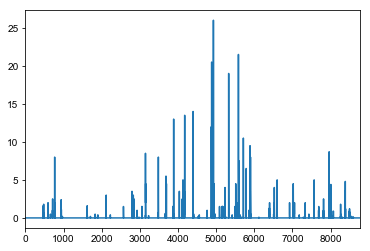

In [58]:
df.시간강수량.plot()

1시간에 하나의 정보가 있으므로 24\*365=8760 개의 데이터가 그려진다. 이 것을 일일 강수량으로 그려보고자 한다. resample 메서드는 데이터를 주어진 기준으로 리샘플링한다. 샘플링이 현재 1시간 단위로 되어있는데 이 것을 1일 단위 샘플로 변경한다. '1D'가 1일 단위로 리샘플 하라는 의미이고 how는 하루의 데이터 합계를 구하라는 의미이다. 하지만 이것을 위해서는 인덱스 열이 datetime 포맷이어야 한다. '일시' 열을 datetime 포맷으로 변경하자.

In [59]:
df.일시 = pd.to_datetime(df.일시)

In [60]:
df.head()

,지점번호,지점,일시,기온,시간강수량,풍향,풍속,해면기압
0,108,서울,2014-01-01 00:00:00,3.3,0.0,250.0,3.8,1012.5
1,108,서울,2014-01-01 01:00:00,2.6,0.0,250.0,2.3,1012.9
2,108,서울,2014-01-01 02:00:00,1.7,0.0,250.0,1.7,1013.1
3,108,서울,2014-01-01 03:00:00,1.4,0.0,250.0,1.4,1012.9
4,108,서울,2014-01-01 04:00:00,0.9,0.0,270.0,2.8,1013.2


'일시' 열을 인덱스 열로 전환한다.

In [61]:
df = df.set_index('일시')
df.head()

,지점번호,지점,기온,시간강수량,풍향,풍속,해면기압
일시,,,,,,,
2014-01-01 00:00:00,108,서울,3.3,0.0,250.0,3.8,1012.5
2014-01-01 01:00:00,108,서울,2.6,0.0,250.0,2.3,1012.9
2014-01-01 02:00:00,108,서울,1.7,0.0,250.0,1.7,1013.1
2014-01-01 03:00:00,108,서울,1.4,0.0,250.0,1.4,1012.9
2014-01-01 04:00:00,108,서울,0.9,0.0,270.0,2.8,1013.2


인덱스 열이 datetime인 경우, 시간에 의한 접근이 가능하다. 다음과 같이 2월1일의 모든 행을 추출할 수 있다.
`head()`를 이용하여 앞 부분만 보인다.

In [62]:
df['2014-02-01'].head()

,지점번호,지점,기온,시간강수량,풍향,풍속,해면기압
일시,,,,,,,
2014-02-01 00:00:00,108,서울,3.7,0.0,70.0,2.8,1021.5
2014-02-01 01:00:00,108,서울,3.9,0.0,70.0,2.4,1021.0
2014-02-01 02:00:00,108,서울,4.1,0.0,90.0,2.1,1020.7
2014-02-01 03:00:00,108,서울,4.2,0.0,70.0,2.6,1020.6
2014-02-01 04:00:00,108,서울,4.3,0.0,70.0,2.2,1019.9


슬라이싱 기능을 이용하면 구간을 정할 수도 있다.
파이썬의 일반적인 슬라이싱과는 달리 종료 지점의 데이터도 포함한다.

In [63]:
df['2014-02-01 06':'2014-02-01 09']

,지점번호,지점,기온,시간강수량,풍향,풍속,해면기압
일시,,,,,,,
2014-02-01 06:00:00,108,서울,4.6,0.0,70.0,2.2,1019.1
2014-02-01 07:00:00,108,서울,4.7,0.0,90.0,3.0,1018.9
2014-02-01 08:00:00,108,서울,4.8,0.0,70.0,2.7,1019.0
2014-02-01 09:00:00,108,서울,5.2,0.0,70.0,4.1,1018.8


자, 이제 리샘플링을 해보자.
그리고 1일 단위로 기온에 대해서 최대, 최소를 계산한다.

In [64]:
최고기온 = df['기온'].resample('1D').max()
최저기온 = df['기온'].resample('1D').min()

강수량에 대해서는 1일 단위로 합을 계산한다.

In [65]:
강수량 = df['시간강수량'].resample('1D').sum()

`df`의 나머지 열에 대해서는 1일 단위로 평균을 계산 한다.

In [66]:
df2 = df.resample('1D').mean()

여기에 '최고기온', '최저기온' 열을 추가하고, 강수량은 계산해 놓은 합계로 대신한다. 그리고 '기온'은 '평균기온'으로 이름을 변경한다.

In [67]:
df2['최고기온'] = 최고기온
df2['최저기온'] = 최저기온
df2['강수량'] = 강수량
df2 = df2.rename(columns={'기온': '평균기온'})
df2.head()

,지점번호,평균기온,시간강수량,풍향,풍속,해면기압,최고기온,최저기온,강수량
일시,,,,,,,,,
2014-01-01,108,4.008333,0.0,252.500000,3.716667,1013.770833,7.6,0.5,0.0
2014-01-02,108,1.875000,0.0,271.666667,2.045833,1021.129167,6.0,-1.2,0.0
2014-01-03,108,2.291667,0.0,155.833333,2.508333,1017.808333,6.9,-1.0,0.0
2014-01-04,108,0.145833,0.0,278.333333,2.520833,1019.391667,5.4,-3.7,0.0
2014-01-05,108,-0.845833,0.0,268.333333,1.987500,1023.579167,3.6,-4.2,0.0


이들 중에서 '지점번호', '평균기온', '최고기온', '최저기온', '강수량', '해면기압' 열만 취한다.

In [68]:
df3 = df2[['지점번호', '평균기온', '최고기온', '최저기온', '강수량', '해면기압']]

In [69]:
df3.head()

,지점번호,평균기온,최고기온,최저기온,강수량,해면기압
일시,,,,,,
2014-01-01,108,4.008333,7.6,0.5,0.0,1013.770833
2014-01-02,108,1.875000,6.0,-1.2,0.0,1021.129167
2014-01-03,108,2.291667,6.9,-1.0,0.0,1017.808333
2014-01-04,108,0.145833,5.4,-3.7,0.0,1019.391667
2014-01-05,108,-0.845833,3.6,-4.2,0.0,1023.579167


'평균기온', '최저기온', '최고기온'에 대한 그래프를 그려본다.

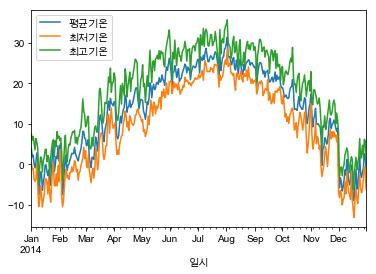

In [70]:
df3[['평균기온', '최저기온', '최고기온']].plot()

너무 그림이 자세하게 보인다. 1개월 단위의 그래프를 그리기 위해서 다시 리샘플링 한다.

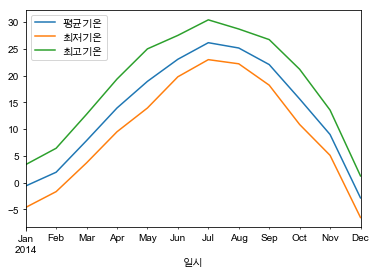

In [71]:
df4 = df3.resample('1M').mean()
df4[['평균기온', '최저기온', '최고기온']].plot()

이번에는 x 축의 월 표시를 숫자로 바꿔보기로 한다.

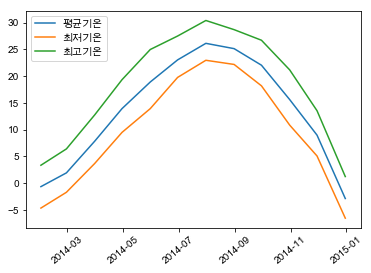

In [72]:
import matplotlib.pyplot as plt
from matplotlib import dates

ax = plt.subplot(111)
ax.plot(df4.index, df4.평균기온, label="평균기온")
ax.plot(df4.index, df4.최저기온, label="최저기온")
ax.plot(df4.index, df4.최고기온, label="최고기온")

ax.xaxis.set_major_formatter(dates.DateFormatter('%Y-%m'))
labels = ax.get_xticklabels()
plt.setp(labels, rotation=40, fontsize=10)

plt.legend()

월별/일별 강수량 그래프를 그려보자. 월 강수량은 월단위 합계 강수량이다.

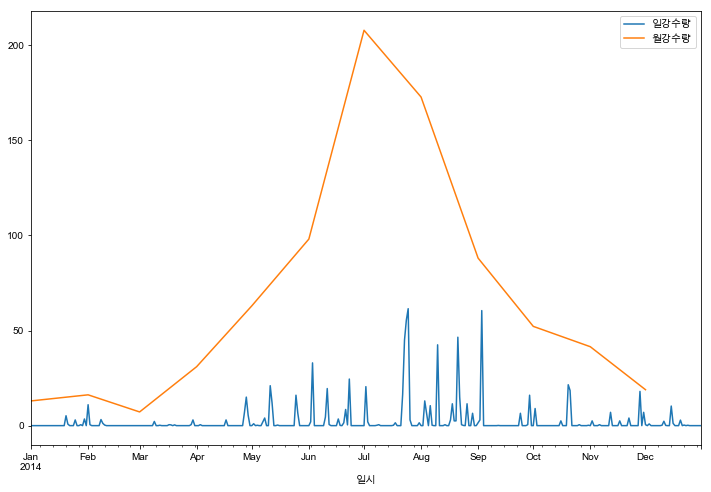

In [73]:
df3['강수량'].plot(figsize=(12,8), label='일강수량', legend=True)
df4 = df3.resample('1M').sum()
df4['강수량'].plot(label='월강수량', legend=True)

이번에는 하루 3mm 이상의 강수량을 보인 일 수가 월별로 몇 일 인지 그래프를 그려보자.
생각한 것 보다는 날 수가 많지 않다. 장마 기간인 7월에 비온 날 수는 6일에 불과 했으며 오히려 8월에 10회나 비가 내린 것으로 나온다.
대신에 비의 양은 7월이 가장 많았다.

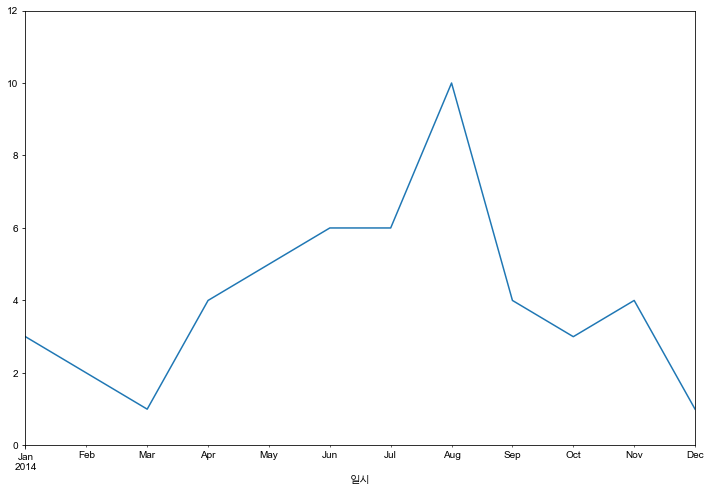

In [74]:
df5 = df3[df3.강수량 >= 3]['강수량']
df5.resample('1M').count().plot(figsize=(12,8), ylim=(0, 12))